# Import CSV file with Pandas

In [251]:
import pandas as pd
from sklearn.cluster import KMeans
# Load the dataset
capitals = pd.read_csv('us-state-capitals.csv')
capitals.head()

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629


# K-means clustering

In [252]:
kmeans = KMeans(n_clusters=12, init='k-means++',random_state=42)  # 可以根据需要调整群组数量
coordinates = capitals[['latitude', 'longitude']]
capitals['cluster'] = kmeans.fit_predict(coordinates)
# Check the distribution of states across clusters
cluster_distribution = capitals['cluster'].value_counts()
# Display the distribution
cluster_distribution

D:\Python\123\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
5     7
6     7
10    6
2     6
0     5
9     4
1     4
7     4
8     3
11    2
4     1
3     1
Name: count, dtype: int64

In [253]:
capitals

,name,description,latitude,longitude,cluster
0,Alabama,Montgomery,32.377716,-86.300568,0
1,Alaska,Juneau,58.301598,-134.420212,4
2,Arizona,Phoenix,33.448143,-112.096962,11
3,Arkansas,Little Rock,34.746613,-92.288986,9
4,California,Sacramento,38.576668,-121.493629,1
5,Colorado,Denver,39.739227,-104.984856,7
6,Connecticut,Hartford<br>,41.764046,-72.682198,5
7,Delaware,Dover,39.157307,-75.519722,10
8,Hawaii,Honolulu,21.307442,-157.857376,3
9,Florida,Tallahassee,30.438118,-84.281296,0


In [254]:
# Calculate centroids for each region
region_centroids = {i: (centroid[0], centroid[1]) for i, centroid in enumerate(kmeans.cluster_centers_)}
# Print centroids for each region
for region, centroid in region_centroids.items():
    print(f"Centroid coordinates for Region {region} are: Latitude {centroid[0]}, Longitude {centroid[1]}")

Centroid coordinates for Region 0 are: Latitude 33.78029, Longitude -83.5231264
Centroid coordinates for Region 1 are: Latitude 42.428712, Longitude -121.79879174999999
Centroid coordinates for Region 2 are: Latitude 40.07897633333334, Longitude -94.7933045
Centroid coordinates for Region 3 are: Latitude 21.307442, Longitude -157.857376
Centroid coordinates for Region 4 are: Latitude 58.301598, Longitude -134.420212
Centroid coordinates for Region 5 are: Latitude 42.91178085714286, Longitude -71.83127942857142
Centroid coordinates for Region 6 are: Latitude 39.95559757142857, Longitude -86.34515157142857
Centroid coordinates for Region 7 are: Latitude 43.01684175, Longitude -102.73370374999999
Centroid coordinates for Region 8 are: Latitude 43.66032033333333, Longitude -113.368792
Centroid coordinates for Region 9 are: Latitude 31.94555, Longitude -92.84970849999999
Centroid coordinates for Region 10 are: Latitude 38.656722, Longitude -76.622818
Centroid coordinates for Region 11 are: 

In [255]:
# For each name in capitals, add centroid coordinates based on cluster value
# Add centroid coordinates to the capitals DataFrame
# Use the map function to map each state capital to its corresponding centroid coordinates based on the cluster it belongs to
capitals['centroid_latitude'] = capitals['cluster'].map(lambda x: region_centroids[x][0])
capitals['centroid_longitude'] = capitals['cluster'].map(lambda x: region_centroids[x][1])
# Display the updated DataFrame to check the new columns
capitals

,name,description,latitude,longitude,cluster,centroid_latitude,centroid_longitude
0,Alabama,Montgomery,32.377716,-86.300568,0,33.780290,-83.523126
1,Alaska,Juneau,58.301598,-134.420212,4,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962,11,34.565191,-109.018345
3,Arkansas,Little Rock,34.746613,-92.288986,9,31.945550,-92.849708
4,California,Sacramento,38.576668,-121.493629,1,42.428712,-121.798792
5,Colorado,Denver,39.739227,-104.984856,7,43.016842,-102.733704
6,Connecticut,Hartford<br>,41.764046,-72.682198,5,42.911781,-71.831279
7,Delaware,Dover,39.157307,-75.519722,10,38.656722,-76.622818
8,Hawaii,Honolulu,21.307442,-157.857376,3,21.307442,-157.857376
9,Florida,Tallahassee,30.438118,-84.281296,0,33.780290,-83.523126


Create a dictionary for further analysis:
Key: Group number
Value: Dataframe of the states within such group, with state name, longitude and latitude

In [256]:
# Create an empty dictionary to store DataFrames for each group
grouped_capitals = {}
# Iterate over all group numbers
for group_number in capitals['cluster'].unique():
    # Select state capitals for the current group and include only specific columns
    group_df = capitals[capitals['cluster'] == group_number][['name', 'latitude', 'longitude']]
    # Store the DataFrame in the dictionary
    grouped_capitals[group_number] = group_df
# Print the keys of the dictionary and the first few rows of each DataFrame corresponding to each key for validation
for key, df in grouped_capitals.items():
    print(f"Group {key} contains the following state capitals:")
    print(df.head(), '\n')  # Display only the first few rows of each group DataFrame

Group 0 contains the following state capitals:
              name   latitude  longitude
0          Alabama  32.377716 -86.300568
9          Florida  30.438118 -84.281296
10         Georgia  33.749027 -84.388229
39  South Carolina  34.000343 -81.033211
47   West Virginia  38.336246 -81.612328 

Group 4 contains the following state capitals:
     name   latitude   longitude
1  Alaska  58.301598 -134.420212 

Group 11 contains the following state capitals:
          name   latitude   longitude
2      Arizona  33.448143 -112.096962
30  New Mexico  35.682240 -105.939728 

Group 9 contains the following state capitals:
           name   latitude  longitude
3      Arkansas  34.746613 -92.288986
17    Louisiana  30.457069 -91.187393
23  Mississippi  32.303848 -90.182106
42        Texas  30.274670 -97.740349 

Group 1 contains the following state capitals:
          name   latitude   longitude
4   California  38.576668 -121.493629
27      Nevada  39.163914 -119.766121
36      Oregon  44.938461 

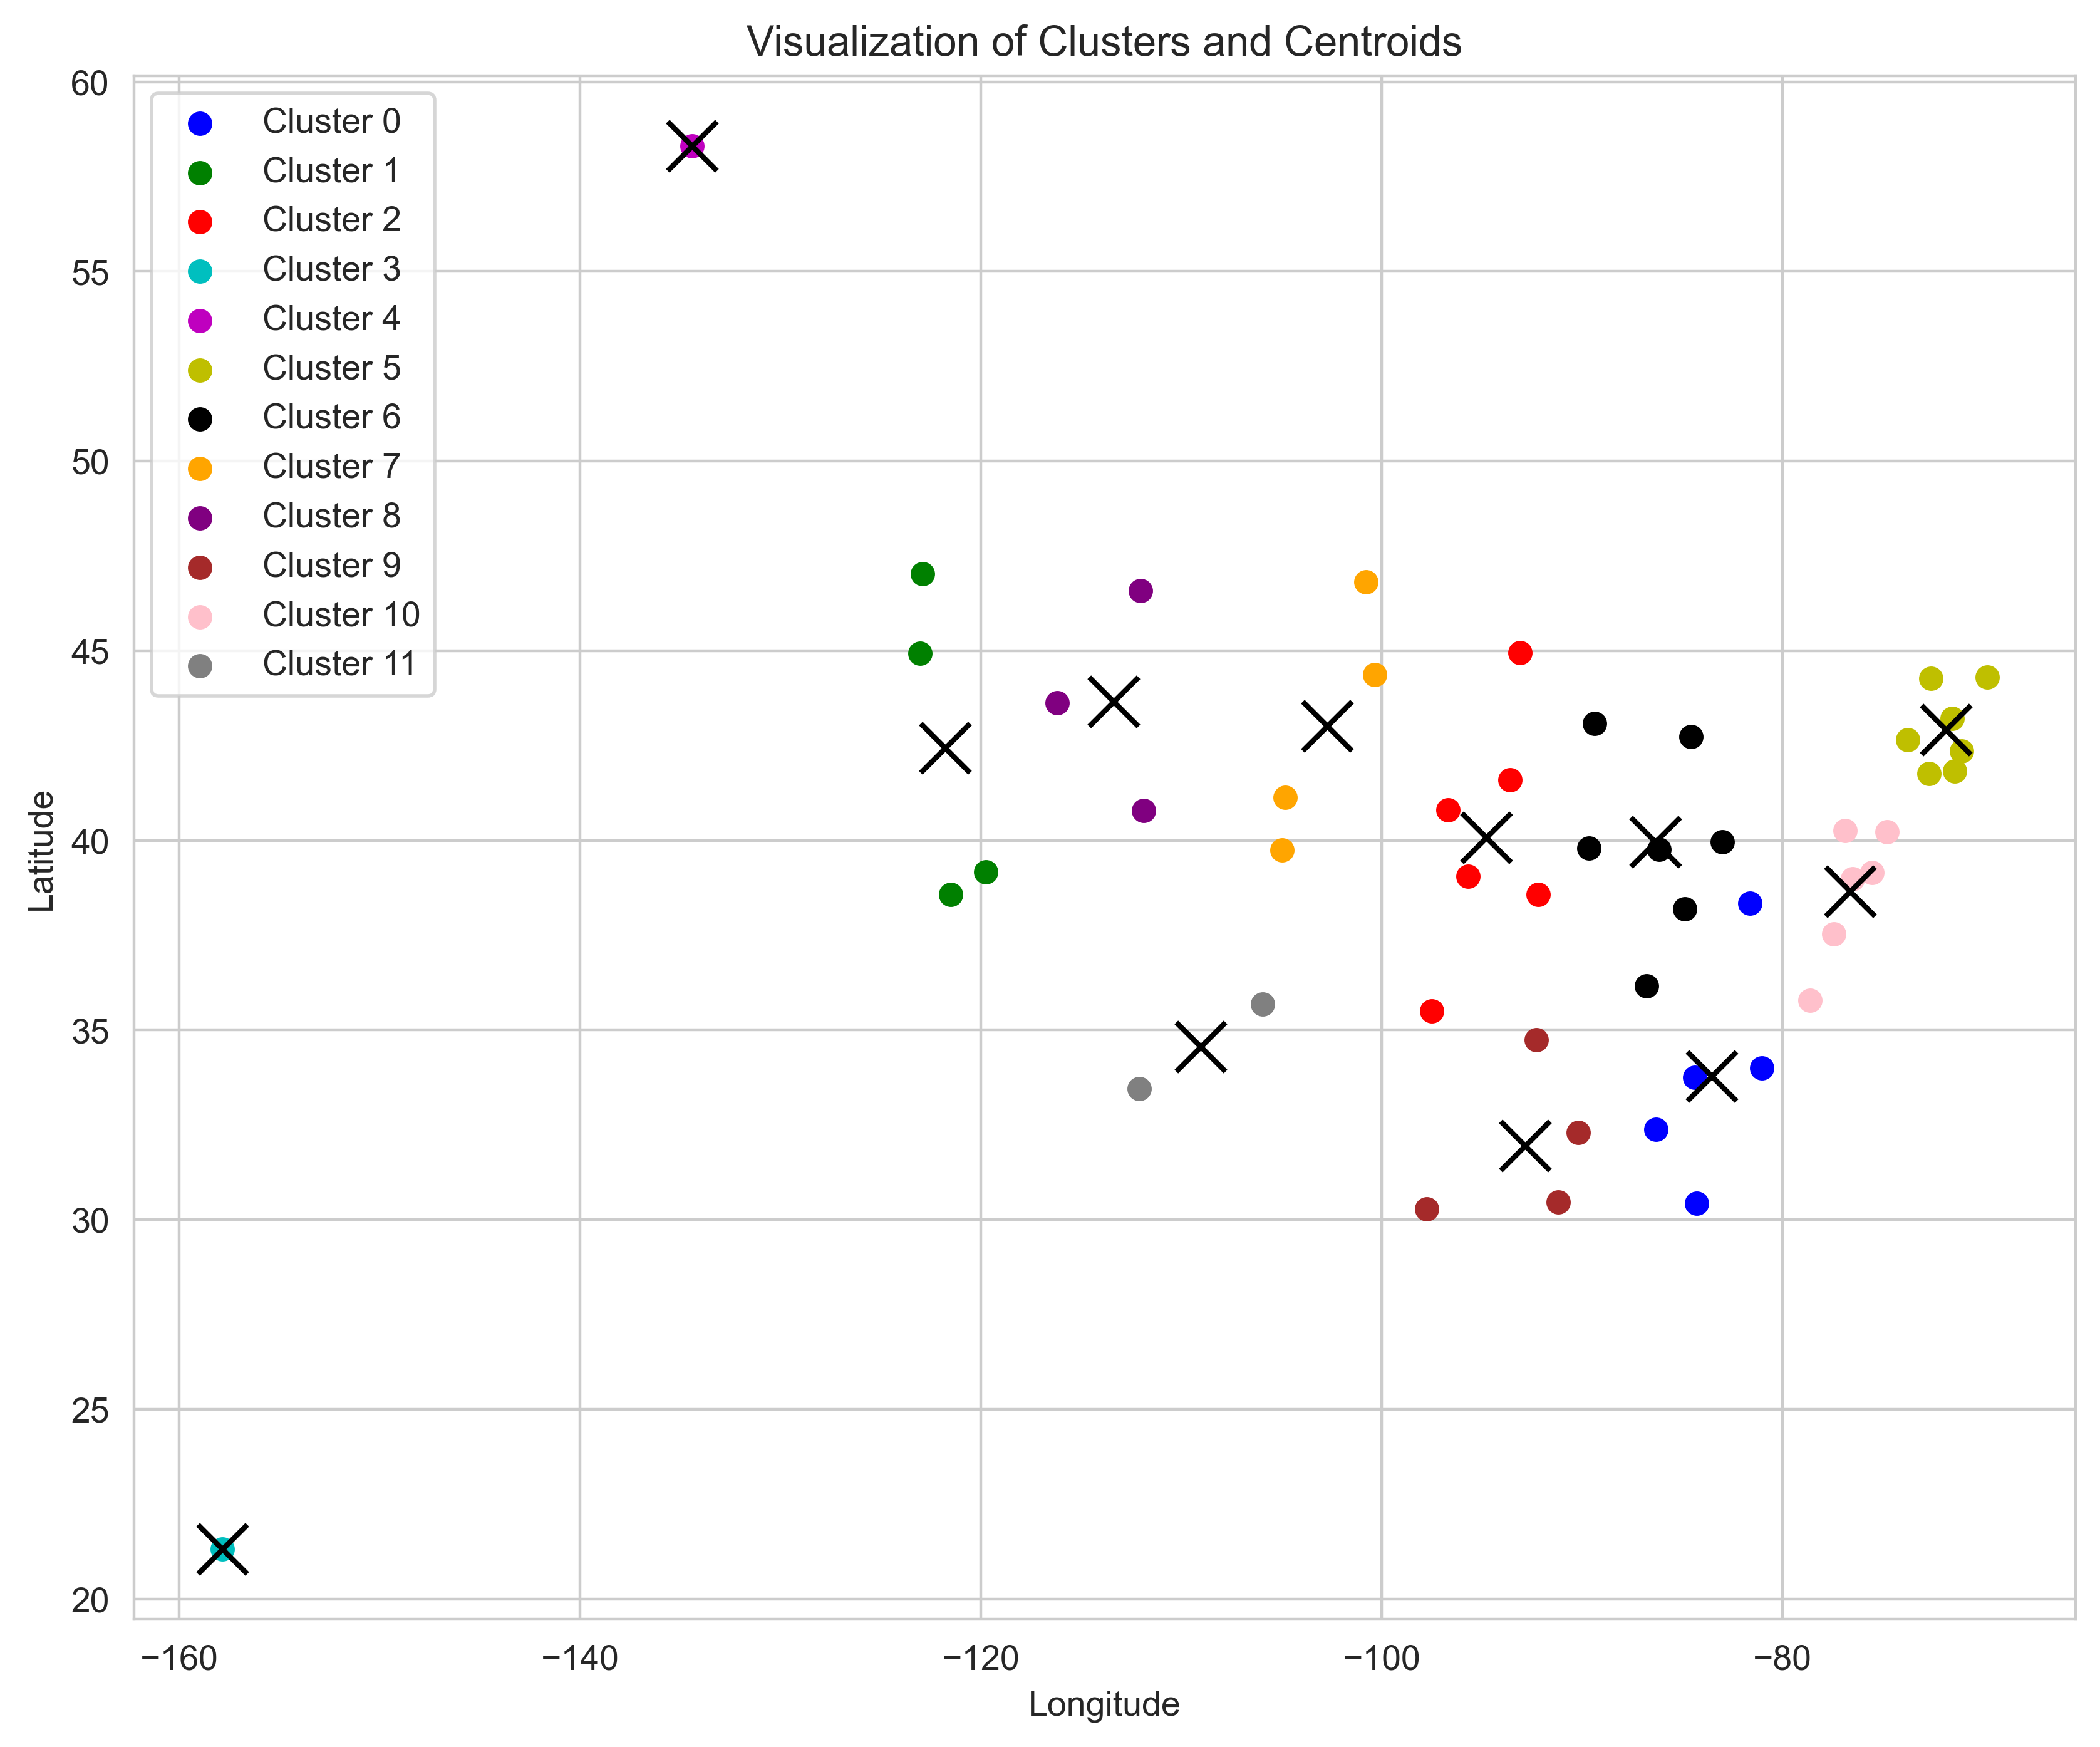

In [257]:
import matplotlib.pyplot as plt
# Define colors for each cluster
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray']
# Visualize the clusters and centroids
plt.figure(figsize=(10, 8), dpi=400)
# Plot data points with cluster colors
for cluster_id in range(len(region_centroids)):
    cluster_points = coordinates[capitals['cluster'] == cluster_id]
    plt.scatter(cluster_points['longitude'], cluster_points['latitude'], label=f'Cluster {cluster_id}', color=colors[cluster_id])
# Plot centroids
for centroid in region_centroids.values():
    plt.scatter(centroid[1], centroid[0], marker='x', color='black', s=200)
plt.title('Visualization of Clusters and Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


Distance Measurement:
Use Python package Geopy to calculate the distance between two point using coordinates.
Input: longitudes and latitudes
Output: distance in mile

In [258]:
def calculate_distance(point1, point2):
    """
    Calculate the distance between two points.
    :param point1: Tuple in the form (latitude, longitude)
    :param point2: Tuple in the form (latitude, longitude)
    :return: Distance between the two points (in miles)
    """
    return geodesic(point1, point2).miles

In [259]:
# Determine the cluster numbers for Iowa and Washington
iowa_cluster = capitals[capitals['description'] == 'Des Moines']['cluster'].iloc[0]
washington_cluster = capitals[capitals['description'] == 'Olympia']['cluster'].iloc[0]
iowa_cluster, washington_cluster

(2, 1)

Shortest Path:
Use permutations to try all the possible paths from the startpoint to the end.
shortest_path: optimal path
shortest distance: smallest distance

In [260]:
from geopy.distance import geodesic
from itertools import permutations
def find_shortest_path_within_cluster(points):
    """
    Calculate the shortest path among all points within a cluster.
    :param points: List of points, each point is a tuple in the form (latitude, longitude)
    :return: Shortest path and its distance
    """
    shortest_distance = float('inf')
    shortest_path = None
    for perm in permutations(points):
        total_distance = sum(calculate_distance(perm[i], perm[i+1]) for i in range(len(perm)-1))
        if total_distance < shortest_distance:
            shortest_distance = total_distance
            shortest_path = perm
    return shortest_path, shortest_distance

def calculate_path_type_1(points):
    """
    Type 1: Category where neither the initial city Iowa nor the ending city Washington is present.
    """
    return find_shortest_path_within_cluster(points)
def calculate_path_type_2(points, start_point):
    """
    Type 2: Category where the initial city is Iowa but the ending city is not Washington.
    Revised: Ensure that the starting point always comes at the beginning of the path.
    """
    # Ensure the starting point is not included in the set of points to be permuted
    points = [p for p in points if p != start_point]

    shortest_distance = float('inf')
    shortest_path = None
    # Add the starting point at the beginning of each permutation
    for perm in permutations(points):
        # Form a complete path including the starting point
        full_path = [start_point] + list(perm)
        # Calculate the total distance for the current permutation
        total_distance = sum(calculate_distance(full_path[i], full_path[i+1]) for i in range(len(full_path)-1))
        # Check if the current permutation forms the shortest path so far
        if total_distance < shortest_distance:
            shortest_distance = total_distance
            shortest_path = full_path
    return shortest_path, shortest_distance
def calculate_path_type_3(points, end_point):
    """
    Type 3: Category where Iowa is not present but Washington is the ending city.
    Revised: Ensure the path ends with end_point.
    """
    # Remove the end point to ensure it doesn't participate in permutation
    points_without_end = [p for p in points if p != end_point]
    shortest_distance = float('inf')
    shortest_path = None
    # Generate permutations of points excluding the end point
    for perm in permutations(points_without_end):
        # Form a complete path including the end point
        full_path = list(perm) + [end_point]
        # Calculate the total distance for the current permutation
        total_distance = sum(calculate_distance(full_path[i], full_path[i+1]) for i in range(len(full_path)-1))
        # Check if the current permutation forms the shortest path so far
        if total_distance < shortest_distance:
            shortest_distance = total_distance
            shortest_path = full_path
    return shortest_path, shortest_distance

In [261]:
# Coordinates of Des Moines, Iowa and Olympia, Washington
iowa_coords = capitals[capitals['description'] == 'Des Moines'][['latitude', 'longitude']].iloc[0].to_list()
washington_coords = capitals[capitals['description'] == 'Olympia'][['latitude', 'longitude']].iloc[0].to_list()
iowa_coords, washington_coords

([41.591087, -93.603729], [47.035805, -122.905014])

In [262]:
# Initialize a dictionary to store the shortest path city name order for each group
group_shortest_paths_names = {}
# Store the shortest path lengths for each category
group_distances = {}
# Iterate over each group and calculate the shortest path
for group_number, group_df in grouped_capitals.items():
    print(f"Calculating shortest path for Group {group_number}...")
    # Extract the city coordinates for the current group
    group_points = [(row['latitude'], row['longitude']) for index, row in group_df.iterrows()]
    # Check if the current group contains specific starting or ending cities
    if group_number == iowa_cluster:
        # Contains Iowa but not Washington
        shortest_path, shortest_distance = calculate_path_type_2(group_points, tuple(iowa_coords))
    elif group_number == washington_cluster:
        # Contains Washington but not Iowa
        shortest_path, shortest_distance = calculate_path_type_3(group_points, tuple(washington_coords))
    else:
        # Neither contains Iowa nor Washington
        shortest_path, shortest_distance = calculate_path_type_1(group_points)
    # Store the city names of the shortest path
    shortest_path_names = [group_df[(group_df['latitude'] == city_coords[0]) & (group_df['longitude'] == city_coords[1])]['name'].values[0] for city_coords in shortest_path]
    group_shortest_paths_names[group_number] = shortest_path_names
    # Store the length of the shortest path
    group_distances[group_number] = shortest_distance
    # Output the results
    print(f"Shortest path for Group {group_number} (in coordinates):", shortest_path)
    print(f"Shortest distance for Group {group_number}:", shortest_distance, "miles")
    print(f"Shortest path for Group {group_number} (in cities):", shortest_path_names)
    print("\n")

Calculating shortest path for Group 0...
Shortest path for Group 0 (in coordinates): ((38.336246, -81.612328), (34.000343, -81.033211), (33.749027, -84.388229), (32.377716, -86.300568), (30.438118, -84.281296))
Shortest distance for Group 0: 819.2335023685254 miles
Shortest path for Group 0 (in cities): ['West Virginia', 'South Carolina', 'Georgia', 'Alabama', 'Florida']


Calculating shortest path for Group 4...
Shortest path for Group 4 (in coordinates): ((58.301598, -134.420212),)
Shortest distance for Group 4: 0 miles
Shortest path for Group 4 (in cities): ['Alaska']


Calculating shortest path for Group 11...
Shortest path for Group 11 (in coordinates): ((33.448143, -112.096962), (35.68224, -105.939728))
Shortest distance for Group 11: 383.28814023065917 miles
Shortest path for Group 11 (in cities): ['Arizona', 'New Mexico']


Calculating shortest path for Group 9...
Shortest path for Group 9 (in coordinates): ((34.746613, -92.288986), (32.303848, -90.182106), (30.457069, -91.1873

In [263]:
group_shortest_paths_names

{0: ['West Virginia', 'South Carolina', 'Georgia', 'Alabama', 'Florida'],
 4: ['Alaska'],
 11: ['Arizona', 'New Mexico'],
 9: ['Arkansas', 'Mississippi', 'Louisiana', 'Texas'],
 1: ['California', 'Nevada', 'Oregon', 'Washington'],
 7: ['Colorado', 'Wyoming', 'South Dakota', 'North Dakota'],
 5: ['New York',
  'Connecticut',
  'Rhode Island',
  'Massachusetts',
  'New Hampshire',
  'Vermont',
  'Maine'],
 10: ['Pennsylvania',
  'New Jersey',
  'Delaware',
  'Maryland',
  'Virginia',
  'North Carolina'],
 3: ['Hawaii'],
 8: ['Montana', 'Idaho', 'Utah'],
 6: ['Tennessee',
  'Kentucky',
  'Indiana',
  'Ohio',
  'Michigan',
  'Wisconsin',
  'Illinois'],
 2: ['Iowa', 'Minnesota', 'Nebraska', 'Kansas', 'Missouri', 'Oklahoma']}

In [264]:
group_distances

{0: 819.2335023685254,
 4: 0,
 11: 383.28814023065917,
 9: 739.6649189949624,
 1: 678.9402658289159,
 7: 586.1831519542237,
 5: 480.58388805338666,
 10: 499.2687620360604,
 3: 0,
 8: 584.984576912559,
 6: 1153.0685762679186,
 2: 1261.37582801255}

In [265]:
# Predefined start and end cluster numbers
start_cluster = iowa_cluster
end_cluster = washington_cluster
def greedy_path(start_cluster, end_cluster, region_centroids):
    path = [start_cluster]
    current_cluster = start_cluster
    remaining_clusters = set(region_centroids.keys()) - {start_cluster, end_cluster}
    while remaining_clusters:
        next_cluster = min(remaining_clusters, key=lambda x: calculate_distance(region_centroids[current_cluster], region_centroids[x]))
        path.append(next_cluster)
        remaining_clusters.remove(next_cluster)
        current_cluster = next_cluster
    path.append(end_cluster)
    total_distance = sum(calculate_distance(region_centroids[path[i]], region_centroids[path[i+1]]) for i in range(len(path)-1))
    return path, total_distance
# Calculate the shortest path and distance
clusters_shortest_path, clusters_shortest_distance = greedy_path(start_cluster, end_cluster, region_centroids)

In [266]:
clusters_shortest_path

[2, 6, 0, 10, 5, 9, 7, 8, 11, 4, 3, 1]

In [267]:
capitals

,name,description,latitude,longitude,cluster,centroid_latitude,centroid_longitude
0,Alabama,Montgomery,32.377716,-86.300568,0,33.780290,-83.523126
1,Alaska,Juneau,58.301598,-134.420212,4,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962,11,34.565191,-109.018345
3,Arkansas,Little Rock,34.746613,-92.288986,9,31.945550,-92.849708
4,California,Sacramento,38.576668,-121.493629,1,42.428712,-121.798792
5,Colorado,Denver,39.739227,-104.984856,7,43.016842,-102.733704
6,Connecticut,Hartford<br>,41.764046,-72.682198,5,42.911781,-71.831279
7,Delaware,Dover,39.157307,-75.519722,10,38.656722,-76.622818
8,Hawaii,Honolulu,21.307442,-157.857376,3,21.307442,-157.857376
9,Florida,Tallahassee,30.438118,-84.281296,0,33.780290,-83.523126


In [269]:
# Initialize total distance
total_distance = 0
# Iterate over the order of visiting clusters and accumulate the shortest path distances within each group
for cluster_id in clusters_shortest_path:
    # Assume the shortest path distances within each group have been computed and stored somewhere, e.g., group_distances[cluster_id]
    total_distance += group_distances[cluster_id]  # Add the shortest path distance within the group
    # Get the last city of the current group and the first city of the next group to calculate the distance between them
    if cluster_id != clusters_shortest_path[-1]:  # If not the last group
        current_cluster_last_city = group_shortest_paths_names[cluster_id][-1]
        next_cluster_first_city = group_shortest_paths_names[clusters_shortest_path[clusters_shortest_path.index(cluster_id) + 1]][0]
        last_city_coords = capitals[capitals['name'] == current_cluster_last_city][['latitude', 'longitude']].iloc[0]
        first_city_coords = capitals[capitals['name'] == next_cluster_first_city][['latitude', 'longitude']].iloc[0]
        # Calculate the distance between the two cities
        inter_cluster_distance = calculate_distance(tuple(last_city_coords), tuple(first_city_coords))
        total_distance += inter_cluster_distance

print('The Politician will have to travel a total of {} miles to visit every state capital while traveling from Iowa to Washington.'.format(total_distance))

The Politician will have to travel a total of 20047.37470936193 miles to visit every state capital while traveling from Iowa to Washington.


In [270]:
# Output the final path in city form
final_city_path = []
# Output the final path in city form
for cluster_id in clusters_shortest_path:
    for city in group_shortest_paths_names[cluster_id]:
        final_city_path.append(city)
print("Final path (in cities):", final_city_path)

Final path (in cities): ['Iowa', 'Minnesota', 'Nebraska', 'Kansas', 'Missouri', 'Oklahoma', 'Tennessee', 'Kentucky', 'Indiana', 'Ohio', 'Michigan', 'Wisconsin', 'Illinois', 'West Virginia', 'South Carolina', 'Georgia', 'Alabama', 'Florida', 'Pennsylvania', 'New Jersey', 'Delaware', 'Maryland', 'Virginia', 'North Carolina', 'New York', 'Connecticut', 'Rhode Island', 'Massachusetts', 'New Hampshire', 'Vermont', 'Maine', 'Arkansas', 'Mississippi', 'Louisiana', 'Texas', 'Colorado', 'Wyoming', 'South Dakota', 'North Dakota', 'Montana', 'Idaho', 'Utah', 'Arizona', 'New Mexico', 'Alaska', 'Hawaii', 'California', 'Nevada', 'Oregon', 'Washington']


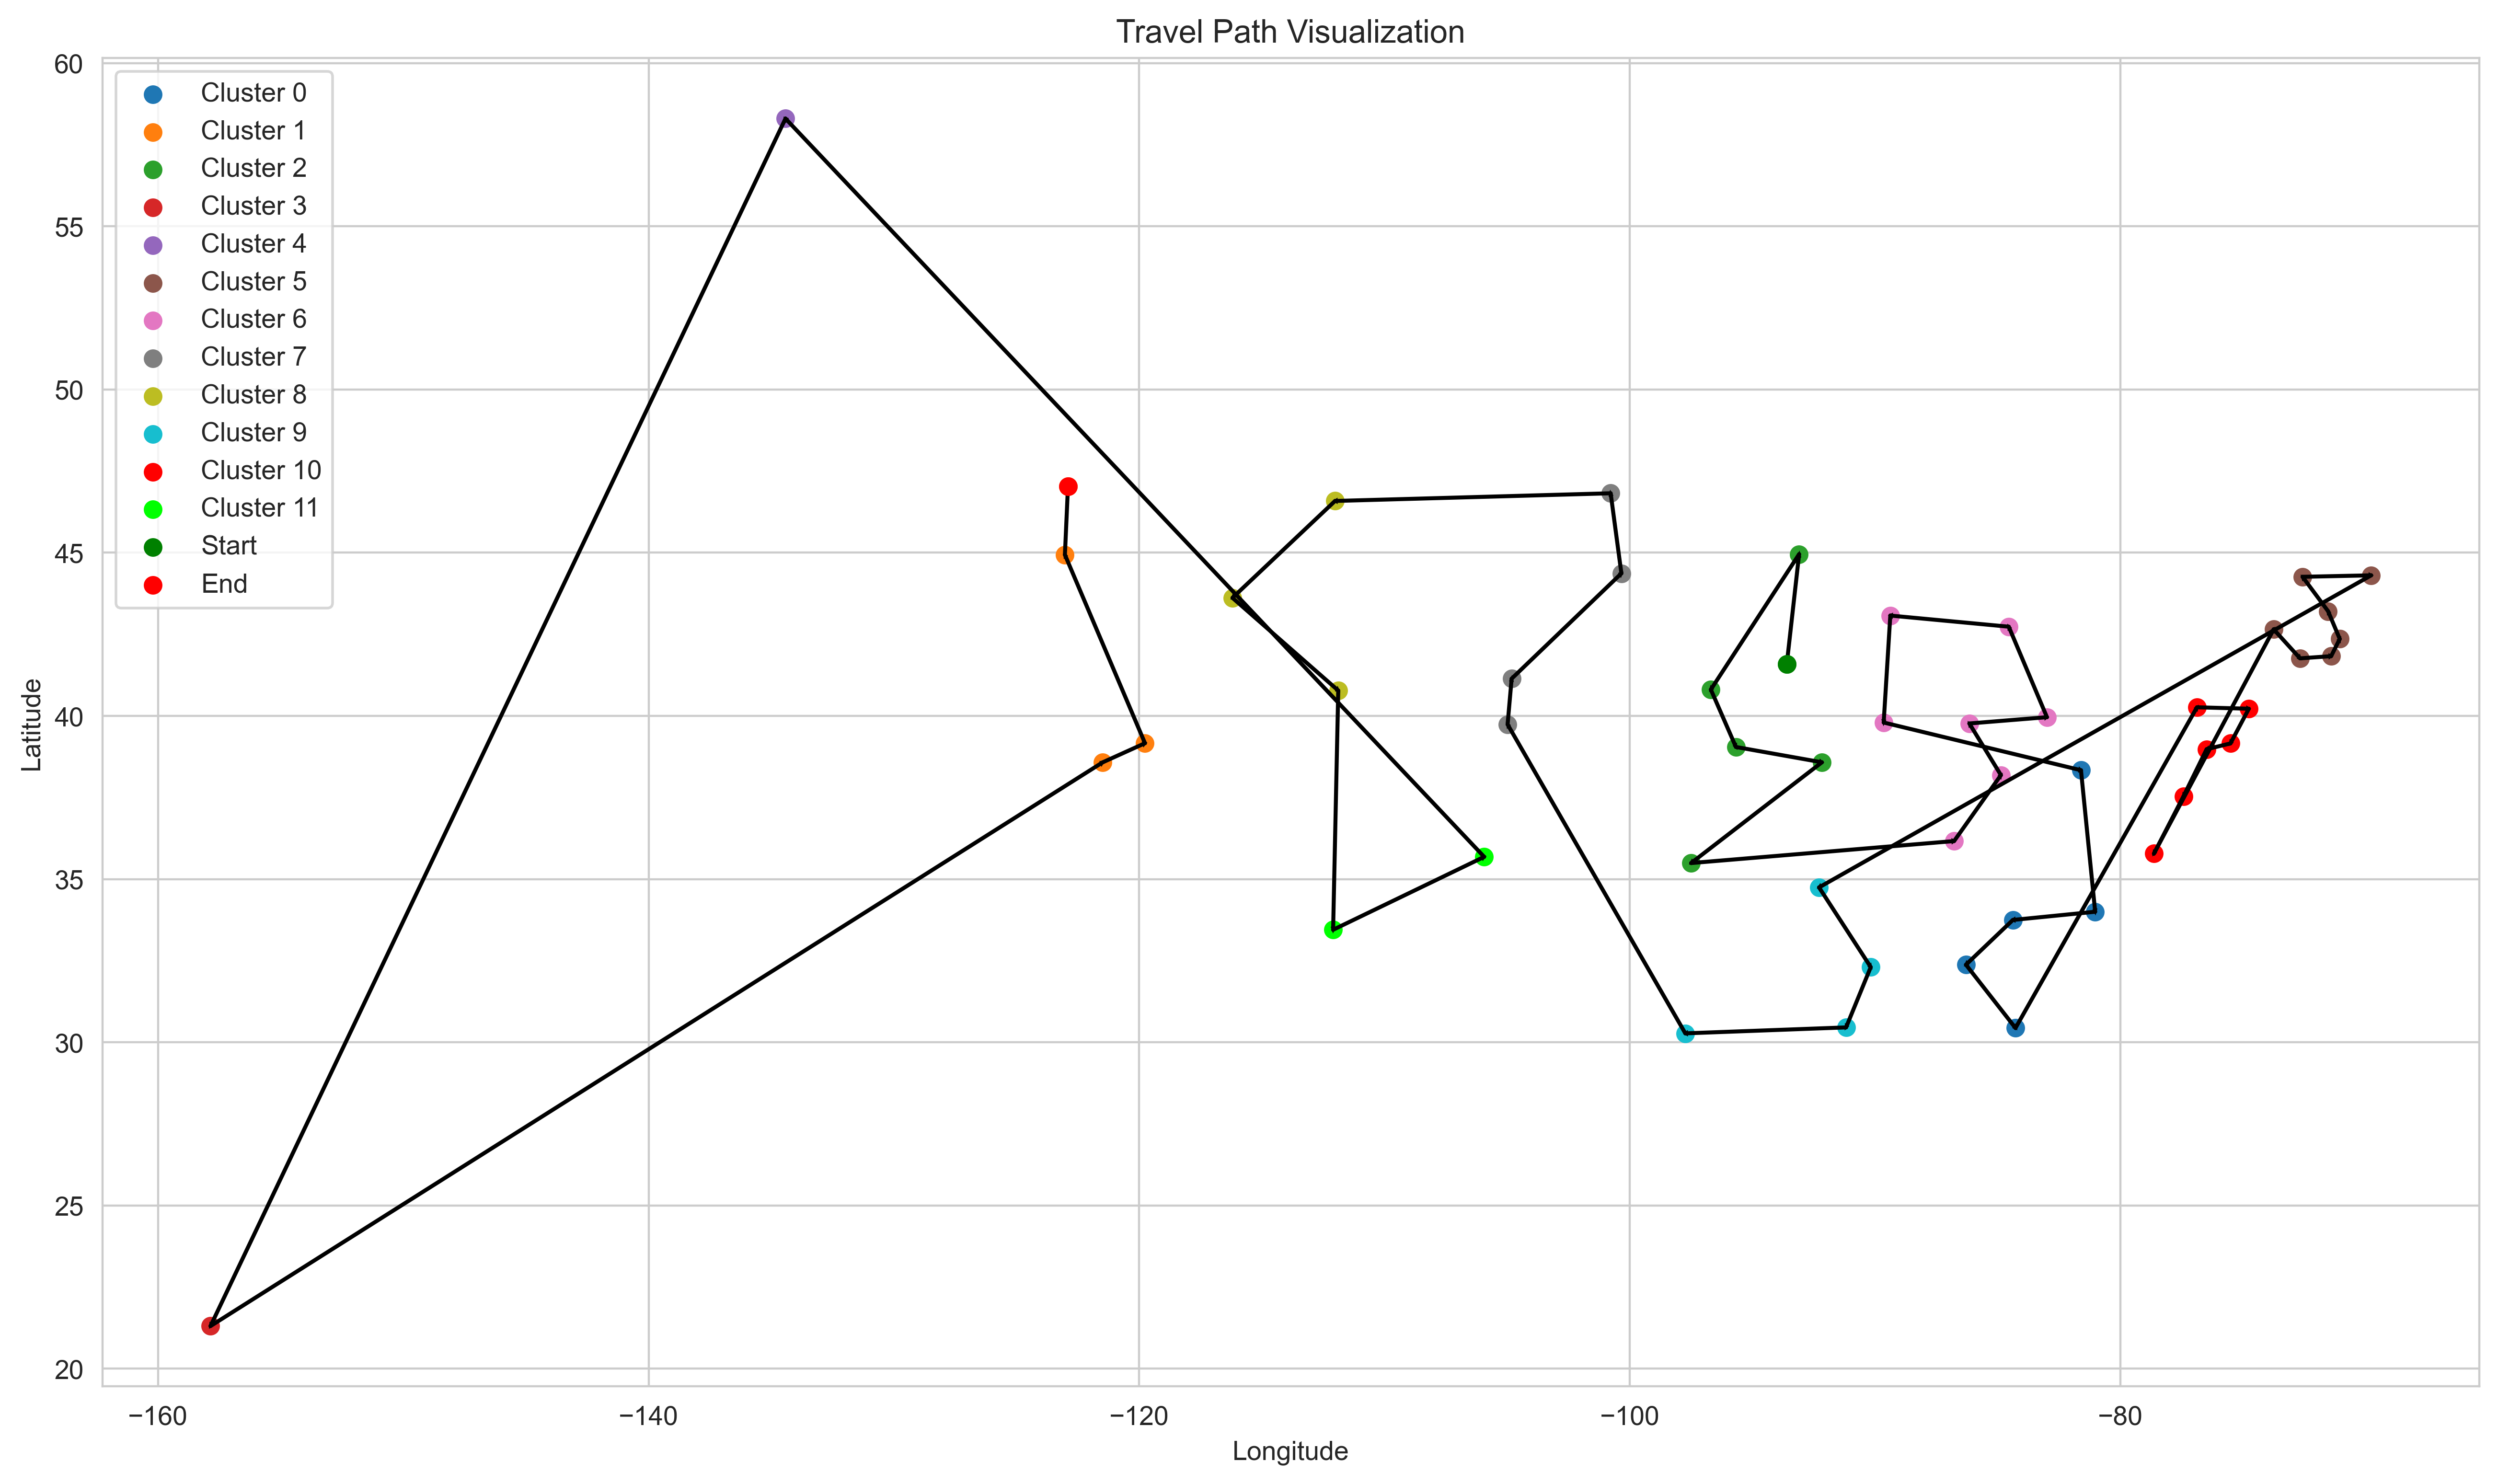

In [276]:
# 定义14种颜色
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff0000', '#00ff00']
# 初始化绘图
plt.figure(figsize=(16, 9), dpi=400)
# 绘制各个州首府的散点图
for cluster_id in range(len(region_centroids)):
    cluster_points = coordinates[capitals['cluster'] == cluster_id]
    plt.scatter(cluster_points['longitude'], cluster_points['latitude'], color=colors[cluster_id], label=f'Cluster {cluster_id}')
# 绘制路径线段和箭头
for i in range(len(final_city_path) - 1):
    current_city = final_city_path[i]
    next_city = final_city_path[i + 1]
    current_city_coords = capitals[capitals['name'] == current_city][['longitude', 'latitude']].iloc[0]
    next_city_coords = capitals[capitals['name'] == next_city][['longitude', 'latitude']].iloc[0]
    dx = next_city_coords[0] - current_city_coords[0]
    dy = next_city_coords[1] - current_city_coords[1]
    plt.arrow(current_city_coords[0], current_city_coords[1], dx, dy, head_width=0.05, head_length=0.05, fc='black', ec='black', length_includes_head=True)
    plt.plot([current_city_coords[0], next_city_coords[0]], [current_city_coords[1], next_city_coords[1]], color='black')
# 添加起点和终点
start_coords = capitals[capitals['name'] == final_city_path[0]][['longitude', 'latitude']].iloc[0]
end_coords = capitals[capitals['name'] == final_city_path[-1]][['longitude', 'latitude']].iloc[0]
plt.scatter(start_coords[0], start_coords[1], color='green', label='Start', zorder=5)  # zorder设置散点图层级，确保起点在顶层
plt.scatter(end_coords[0], end_coords[1], color='red', label='End', zorder=5)
# 添加标签和标题
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Travel Path Visualization')
# 显示图例
plt.legend()
# 显示网格
plt.grid(True)
# 显示图表
plt.show()